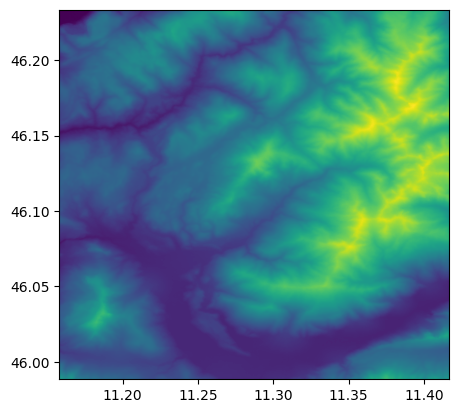

<AxesSubplot: >

In [5]:
import rasterio
from rasterio.plot import show
fp = r'data/mocheni.tif'
img = rasterio.open(fp)
show(img)

In [4]:
#https://github.com/Deltares/pyflwdir
import rasterio
with rasterio.open("data/cavalese.tif", "r") as src:
    elevtn = src.read(1)
    nodata = src.nodata
    transform = src.transform
    crs = src.crs

In [7]:
import pyflwdir
#help(pyflwdir)
#https://github.com/Deltares/pyflwdir
flw = pyflwdir.from_dem(
    data=elevtn,
    nodata=nodata,
    transform=transform,
    latlon=crs.is_geographic,
)
basins = flw.basins()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<ufunc 'isnan'>) found for signature:
 
 >>> isnan(none)
 
There are 2 candidate implementations:
[1m   - Of which 2 did not match due to:
   Overload in function 'Numpy_rules_ufunc.generic': File: numba/core/typing/npydecl.py: Line 98.
     With argument(s): '(none)':[0m
[1m    Rejected as the implementation raised a specific error:
      TypingError: [1mcan't resolve ufunc isnan for types [none][0m[0m
  raised from /opt/conda/lib/python3.10/site-packages/numba/core/typing/npydecl.py:107
[0m
[0m[1mDuring: resolving callee type: Function(<ufunc 'isnan'>)[0m
[0m[1mDuring: typing of call at /opt/conda/lib/python3.10/site-packages/pyflwdir/dem.py (70)
[0m
[1m
File "../../opt/conda/lib/python3.10/site-packages/pyflwdir/dem.py", line 70:[0m
[1mdef fill_depressions(
    <source elided>
    delv = np.zeros_like(elevtn)
[1m    done = np.isnan(elevtn) if np.isnan(nodata) else elevtn == nodata
[0m    [1m^[0m[0m


In [31]:
import geopandas as gpd
feat = flw.streams()
gdf = gpd.GeoDataFrame.from_features(feats, crs=crs)
gdf.to_file('streams.geojson', driver='GeoJSON')

TypeError: 'module' object is not callable